# pandas practice

In [1]:
import pandas as pd
import numpy as np

First Header  | Second Header
------------- | -------------
Content Cell  | Content Cell
Content Cell  | Content Cell

|No|項目|内容|備考|
|:---|------|-----|----|
|1| 内容1|まる|まる|
|2|test||||


In [2]:
#DataFrameをnumpyで行列を作り、インデックスとラベルを貼り付けるパターン
#Create a index
dates = pd.date_range("20130101", periods=6)
dates
#Create a DatFrame
df = pd.DataFrame(np.random.randn(6,4),index = dates, columns = list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.524448,-0.579920,0.352990,-0.284151
2013-01-02,0.927342,0.322560,-0.206513,0.023907
2013-01-03,-0.283596,1.446661,-0.160580,-0.612171
2013-01-04,0.465523,2.034972,0.464610,0.604286
2013-01-05,0.762791,0.006703,-0.641209,-3.197321
2013-01-06,-0.097263,-0.727186,-0.099361,-0.921739


In [18]:
#import matplotlib
%matplotlib inline

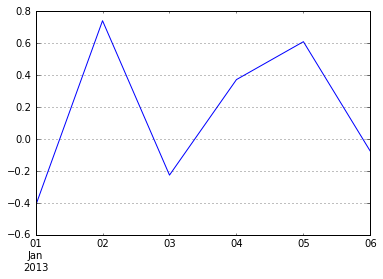

In [20]:
x=df['A']/df['A'].sum()
x.plot().grid()

In [39]:
x=pd.DataFrame(['foo','foo','foo','fox','fox','fox'],index = dates,columns=["Z"])
dx=pd.concat([df,x],axis=1)
dx

,A,B,C,D,Z
2013-01-01,-0.564995,0.488751,-0.826338,1.652820,foo
2013-01-02,-0.235842,0.238453,-0.949845,-0.606036,foo
2013-01-03,0.396327,-1.658735,-0.958302,-1.243180,foo
2013-01-04,0.159820,1.670279,-0.549448,-0.678881,fox
2013-01-05,-1.558506,0.328290,0.696914,0.707140,fox
2013-01-06,-1.234625,-0.954436,2.159748,1.031941,fox


In [44]:
#xx=dx.groupby('Z')[['A','B']].sum()
xx=dx.groupby('Z')[['A','B']].mean()
#xx=pd.pivot_table(dx, values=[u'A', u'B'], index=['Z'],aggfunc=pd.np.mean)
xx           

,A,B
Z,,
foo,-0.134837,-0.310510
fox,-0.877771,0.348044


In [15]:
%matplotlib inline

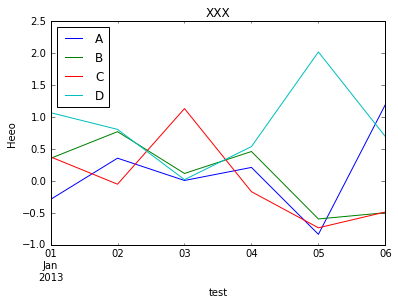

In [28]:
#x=df.ix[:,1]
axes=df.plot()
#axes=x.plot(grid='on',legend='True',title='ts')
axes.set_title('XXX')
axes.set_xlabel('test')
axes.set_ylabel('Heeo')

dx=df.groupby((df['A'],df2['F']))
dx.mean()

In [ ]:
xx=df.ix[:,0]
xx.index=df.index

In [ ]:
%matplotlib inline

In [ ]:
# 列の追加
# core3の列を追加することを考えます。
# 追加したいデータを適当に作ります。データフレーム同士の結合を考えます。

df_addition_col = pd.DataFrame([[120,160,100,180,110,80]]).T #dfと同じ行数を持つDFを作成
df_addition_col.columns =["Z"] #列名は結合後にもそのまま使われる
df_addition_col.index =df.index
df2=pd.concat([df,df_addition_col],axis=1) #axis=1は横方向の結合を指定します。

df=df.ix[:,0:4]
df2
x=df2.ix[:,["A","B"]]
x.plot(title="TEST").grid()

In [ ]:
df3=df2.ix[:,[0:2]]

In [ ]:
df.index=df.ix[:,0]
x=df.ix[:,1]
x.plot()

In [ ]:
import timeit
#ラベル別にSeriesを作るイメージでDataFrameを作成。
df2 = pd.DataFrame({ 'A' : np.random.randn(),
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : ['foo','foo','foo','fox'] })
df2

In [ ]:
ss=df2.ix[:,0]
ss.index=df2.
ss.plot(kind="bar")

In [ ]:
%timeit df2

In [ ]:
dx=df2['A'].groupby((df2['E'],df2['F']))
dx.mean()

In [ ]:
#df2.iloc[:,1]
#df2.index=df2.iloc[:,1]
#df2.plot(df2.index,df2.A)

In [ ]:
#次は欲しい形でデータを見る方法。
df.index
#df.columns
#df.values

In [ ]:
#統計料をまとめて表示
df.describe()
#DataFrameの行列を反転。
#df.T

In [ ]:
#任意の軸でソートをかける。
df.sort(columns='B')

In [ ]:
#データを選び出す
#df.loc['20130102':'20130104',['A','B']]

In [ ]:
x=df.groupby('A')

In [3]:
#Create a DataFrame
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] *2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.255447,0.055158
1,one,B,foo,1.572471,-0.715407
2,two,C,foo,0.174462,0.779293
3,three,A,bar,0.667890,-2.881973
4,one,B,bar,-1.202953,-0.305780
5,one,C,bar,-0.642657,-2.571099
6,two,A,foo,-2.024670,-1.562473
7,three,B,foo,-1.460282,0.534272
8,one,C,foo,0.331680,0.741945
9,one,A,bar,-0.591999,0.843470


In [8]:
#pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'],aggfunc=pd.np.median)
pd.pivot_table(df, values='D', index=['C','B'], columns=['A'],aggfunc=pd.np.median)

A           one     three       two
C   B                              
bar A -0.591999  0.667890       NaN
    B -1.202953       NaN  0.284068
    C -0.642657  0.505617       NaN
foo A  1.255447       NaN -2.024670
    B  1.572471 -1.460282       NaN
    C  0.331680       NaN  0.174462

In [9]:
xf = pd.DataFrame({
    u'Name': ['yamada', 'suzuki', 'sato', 'kimura','suzuki','suzuki'],
    u'Sex': [u'man', u'man', u'woman', u'woman',u'woman','woman'] ,
    u'Length': [181, 173, 159, 164, 164,163],
    u'Weight': [79, 71, 51, 52 ,52,55]})

In [10]:
xf

,Length,Name,Sex,Weight
0,181,yamada,man,79
1,173,suzuki,man,71
2,159,sato,woman,51
3,164,kimura,woman,52
4,164,suzuki,woman,52
5,163,suzuki,woman,55


In [11]:
#pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'],aggfunc=pd.np.median)
#df.pivot_table(values=[u'体重', u'身長'], rows=u'性別',aggfunc=pd.np.mean)
xx=pd.pivot_table(xf, values=[u'Length', u'Weight'], index=['Sex','Name'],aggfunc=pd.np.mean)
xx

Length  Weight
Sex   Name                  
man   suzuki   173.0    71.0
      yamada   181.0    79.0
woman kimura   164.0    52.0
      sato     159.0    51.0
      suzuki   163.5    53.5

In [ ]:
xx.plot()